In [529]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression 

import matplotlib.pyplot as plt
import seaborn as sns

In [530]:
df = pd.read_csv("../dados/nova_plataforma.csv")

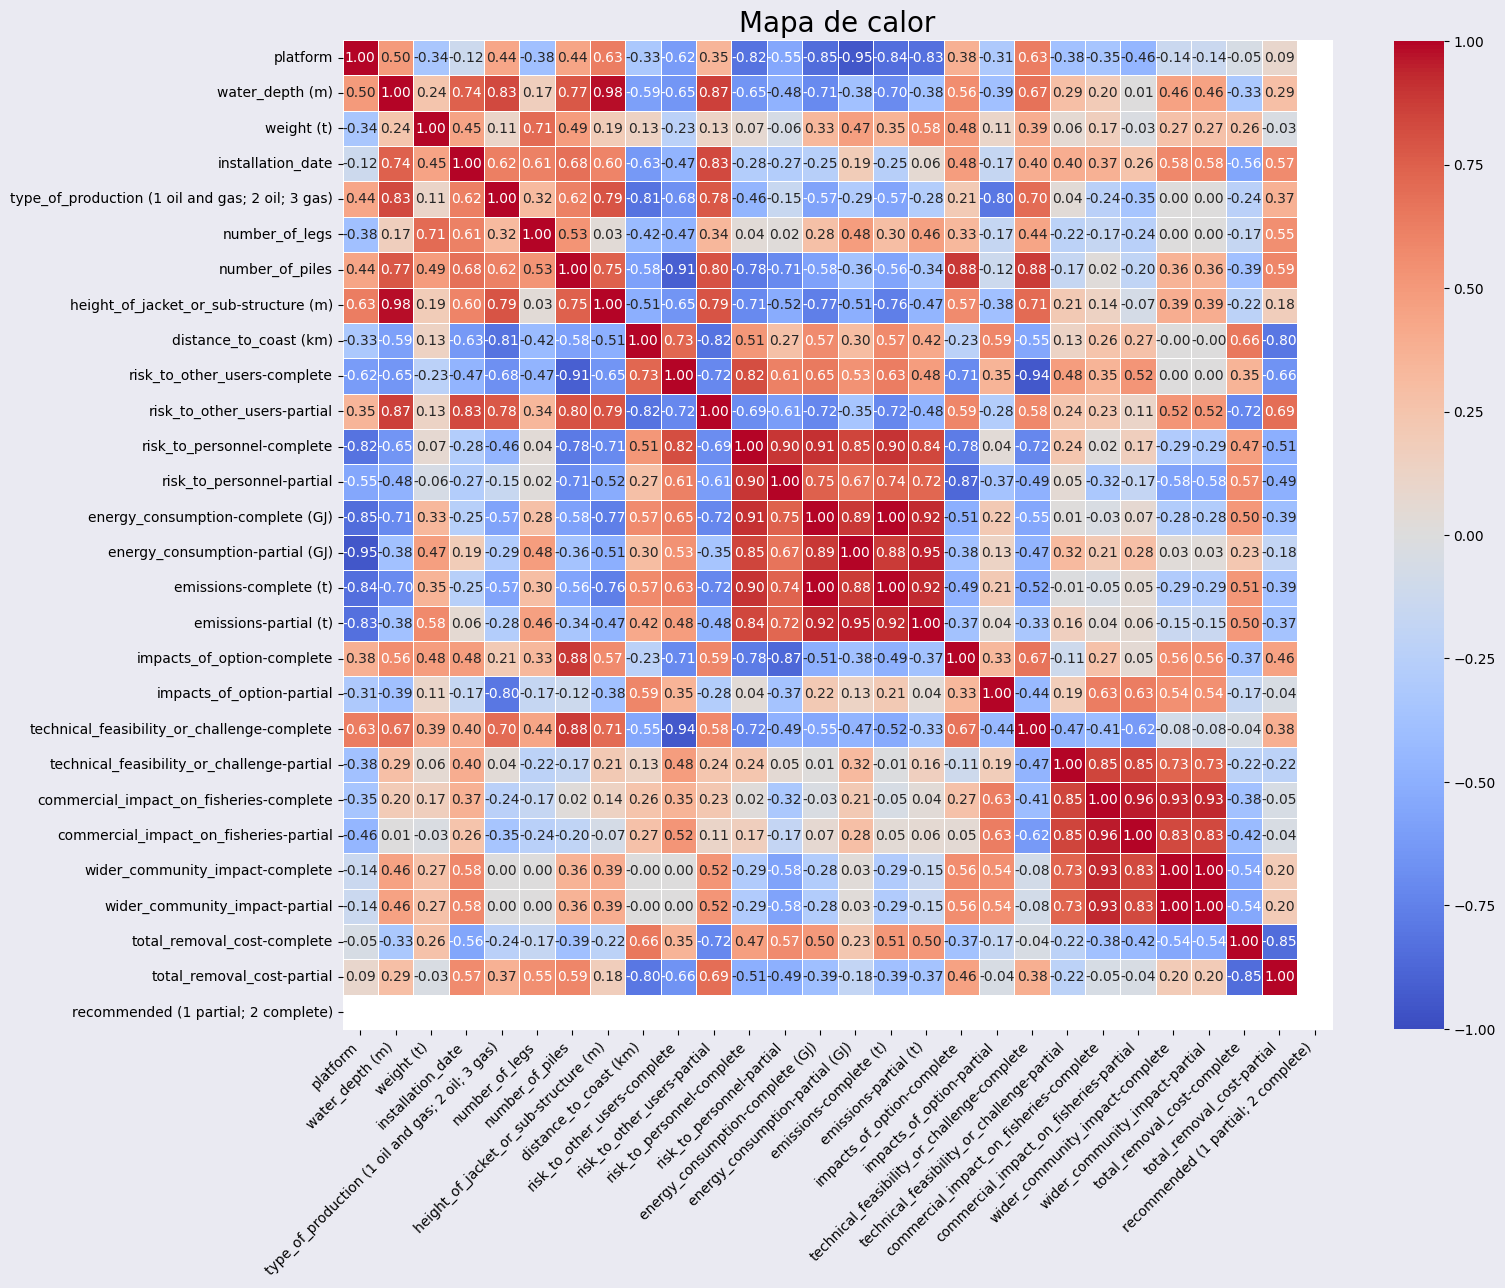

In [531]:
matriz_correlacao_gan = df.corr()

# Plotando o gráfico
plt.figure(figsize=(16, 16), facecolor='#eaeaf2')

ax = sns.heatmap(data=matriz_correlacao_gan,
                xticklabels=df.columns,
                yticklabels=df.columns,
                annot=True, 
                cmap='coolwarm',
                center=0,
                vmin=-1,
                vmax=1,
                square=True,
                fmt='.2f',
                linewidths=0.7,
                cbar=True,
                cbar_kws={"shrink": 0.685} 

)

# Ajustando as labels na linha x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# título e apresentação do gráfico
plt.title('Mapa de calor', fontsize=20)

plt.tight_layout()

plt.show()

### Função para treinar o modelo de regressão linear

In [532]:
def treinar_atributo(coluna_treinamento, coluna_alvo, dataframe):
    regressao_linear = LinearRegression()

    # Redimensionando os arrays de entrada
    X = dataframe[coluna_treinamento].values
    y = dataframe[coluna_alvo].values

    # Treinando o modelo
    regressao_linear.fit(X, y)
    return regressao_linear

### Função para mapear a coluna risk_to_others_users-complete

In [533]:
def mapear_0_ou_1(valor):
    if valor <= 0.5:
        return 0
    else:
        return 1

### Tratando plataforma 27

In [534]:
df = df.drop(5)

OBS: Para a plataforma 27, o treinamento tem que ocorrer sem a influência da mesma

#### Coluna risk_to_other_users-complete

In [535]:
df[["risk_to_personnel-complete", "risk_to_other_users-complete"]]

,risk_to_personnel-complete,risk_to_other_users-complete
0,0.290,1
1,0.320,1
2,0.025,0
3,0.040,0
4,0.090,0
6,0.140,1


In [536]:
risk_to_other_users_complete = treinar_atributo(["risk_to_personnel-complete"], "risk_to_other_users-complete", df)

##### Analisando a regressão

In [537]:
X = df["risk_to_personnel-complete"].values.reshape(-1, 1)
y = df["risk_to_other_users-complete"].values.reshape(-1, 1)

previsoes = risk_to_other_users_complete.predict(X)

# Aplicando a função a todos os elementos do array
vectorized_mapear = np.vectorize(mapear_0_ou_1)
previsoes = vectorized_mapear(previsoes)

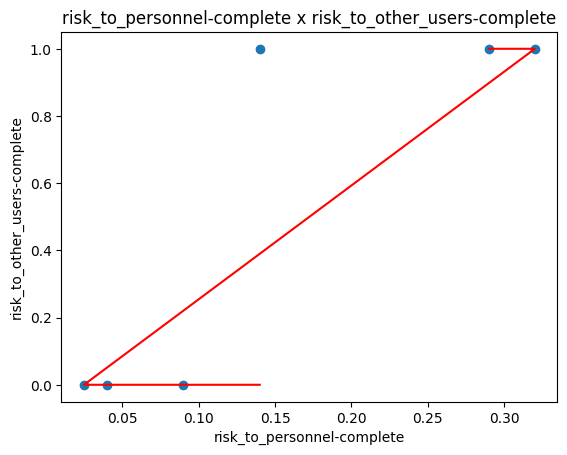

In [538]:
plt.plot(X, y, 'o');
plt.plot(X, previsoes, color='red');

# Descrição
plt.title("risk_to_personnel-complete x risk_to_other_users-complete");
plt.xlabel("risk_to_personnel-complete");
plt.ylabel("risk_to_other_users-complete");

#### Coluna risk_to_other_users-partil

In [539]:
df[["number_of_piles", "risk_to_other_users-partial"]]

,number_of_piles,risk_to_other_users-partial
0,8,0.000000e+00
1,9,0.000000e+00
2,26,2.300000e-05
3,32,1.500000e-05
4,20,7.800000e-08
6,5,0.000000e+00


In [540]:
risk_to_other_users_partial = treinar_atributo(["number_of_piles"], "risk_to_other_users-partial", df)

##### Analisando a regressão

In [541]:
X = df["number_of_piles"].values.reshape(-1, 1)
y = df["risk_to_other_users-partial"].values.reshape(-1, 1)

previsoes = risk_to_other_users_partial.predict(X)

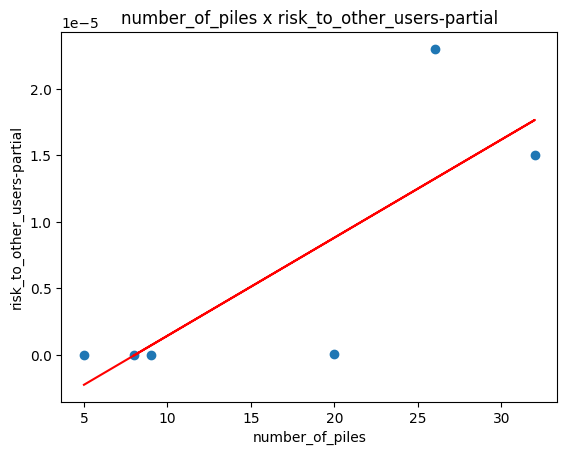

In [542]:
plt.plot(X, y, 'o');
plt.plot(X, previsoes, color='red');

# Descrição
plt.title("number_of_piles x risk_to_other_users-partial");
plt.xlabel("number_of_piles");
plt.ylabel("risk_to_other_users-partial");

#### Coluna total_removal_cost-complete

In [543]:
df[["distance_to_coast (km)", "total_removal_cost-complete"]]

,distance_to_coast (km),total_removal_cost-complete
0,269,1.00
1,259,1.00
2,120,0.53
3,240,1.00
4,230,1.00
6,282,1.00


In [544]:
total_removal_cost_complete = treinar_atributo(["distance_to_coast (km)"], "total_removal_cost-complete", df)

##### Analisando regressão

In [545]:
X = df["distance_to_coast (km)"].values.reshape(-1, 1)
y = df["total_removal_cost-complete"].values.reshape(-1, 1)

previsoes = total_removal_cost_complete.predict(X)

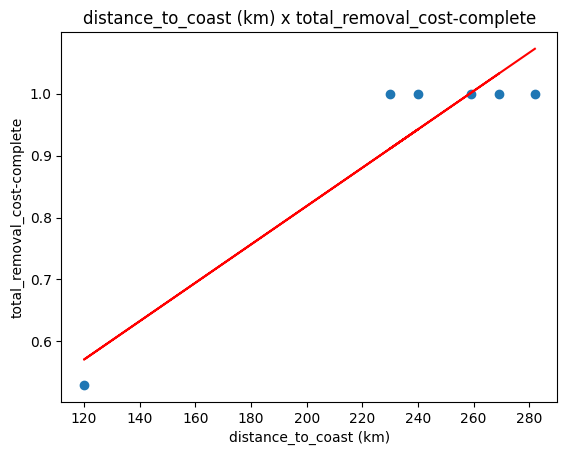

In [546]:
plt.plot(X, y, 'o');
plt.plot(X, previsoes, color='red');

# Descrição
plt.title("distance_to_coast (km) x total_removal_cost-complete");
plt.xlabel("distance_to_coast (km)");
plt.ylabel("total_removal_cost-complete");

#### Coluna total_removal_cost-partial

In [547]:
df[['risk_to_other_users-partial', "total_removal_cost-partial"]]

,risk_to_other_users-partial,total_removal_cost-partial
0,0.000000e+00,0.56
1,0.000000e+00,0.56
2,2.300000e-05,1.00
3,1.500000e-05,0.57
4,7.800000e-08,0.73
6,0.000000e+00,0.41


In [548]:
total_removal_cost_partial = treinar_atributo(["risk_to_other_users-partial"], "total_removal_cost-partial", df)

##### Analisando a regressão

In [549]:
X = df["risk_to_other_users-partial"].values.reshape(-1, 1)
y = df["total_removal_cost-partial"].values.reshape(-1, 1)

previsoes = total_removal_cost_partial.predict(X)

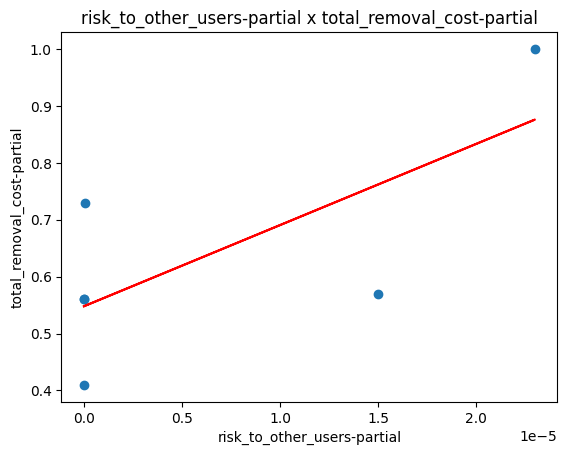

In [550]:
plt.plot(X, y, 'o');
plt.plot(X, previsoes, color='red');

# Descrição
plt.title("risk_to_other_users-partial x total_removal_cost-partial");
plt.xlabel("risk_to_other_users-partial");
plt.ylabel("total_removal_cost-partial");

### Tratando a Plataforma 26

In [551]:
df = pd.read_csv("../dados/nova_plataforma.csv")

In [552]:
df = df.drop(4)

#### Coluna impacts_of_option-complete

In [553]:
df[["number_of_piles", "impacts_of_option-complete"]]

,number_of_piles,impacts_of_option-complete
0,8,0.00
1,9,0.00
2,26,0.66
3,32,1.00
5,20,0.00
6,5,0.00


In [554]:
impacts_of_option_complete = treinar_atributo(["number_of_piles"], "impacts_of_option-complete", df)

In [555]:
p26_impacts_of_option_complete = impacts_of_option_complete.predict([[20]])
p26_impacts_of_option_complete

array([0.39541436])

##### Analisando regressão

In [556]:
X = df["number_of_piles"].values.reshape(-1, 1)
y = df["impacts_of_option-complete"].values.reshape(-1, 1)

previsoes = impacts_of_option_complete.predict(X)

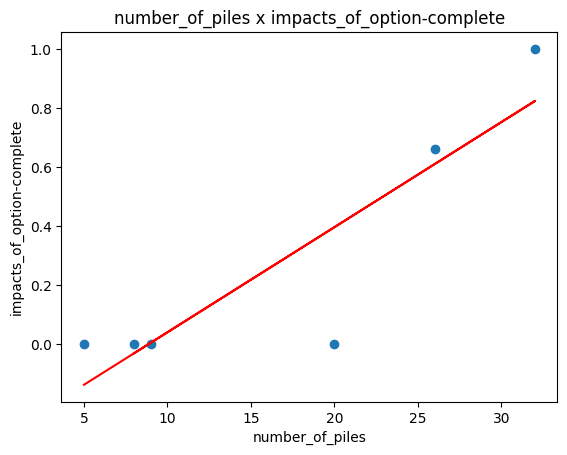

In [557]:
plt.plot(X, y, 'o');
plt.plot(X, previsoes, color='red');

# Descrição
plt.title("number_of_piles x impacts_of_option-complete");
plt.xlabel("number_of_piles");
plt.ylabel("impacts_of_option-complete");

#### Coluna impacts_of_option-partial

In [558]:
df[["commercial_impact_on_fisheries-partial", "impacts_of_option-complete"]]

,commercial_impact_on_fisheries-partial,impacts_of_option-complete
0,0.78,0.00
1,0.78,0.00
2,0.94,0.66
3,0.66,1.00
5,0.00,0.00
6,0.78,0.00


In [559]:
commercial_impact_on_fisheries_partial = treinar_atributo(["commercial_impact_on_fisheries-partial"], "impacts_of_option-complete", df)

##### Analisando a regressão linear

In [560]:
X = df["commercial_impact_on_fisheries-partial"].values.reshape(-1, 1)
y = df["impacts_of_option-complete"].values.reshape(-1, 1)

previsoes = commercial_impact_on_fisheries_partial.predict(X)

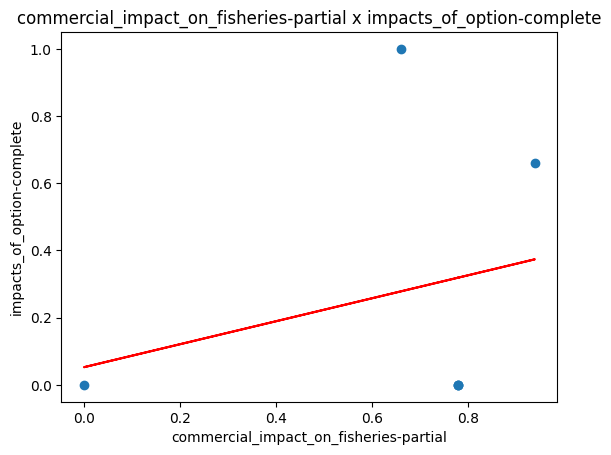

In [561]:
plt.plot(X, y, 'o');
plt.plot(X, previsoes, color='red');

# Descrição
plt.title("commercial_impact_on_fisheries-partial x impacts_of_option-complete");
plt.xlabel("commercial_impact_on_fisheries-partial");
plt.ylabel("impacts_of_option-complete");